In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


**Reading data**

In [25]:
def print_separator(char,times):
    print(char*times)

def read_data(filename,file_format='csv'):
    if not os.path.isfile(filename) or not os.access(filename, os.R_OK):
        print("-E- Cannot access fle:", filename)
        return()
    if file_format == 'json':
        data=pd.read_json (filename)
    else:
        data=pd.read_csv(filename)
    print_separator("-",15)
    print("Read data from:", filename)
    print_separator("-",15)
    return(data)
    

**Data Description**

In [55]:
def describe_data(data):
    print_separator("*",15)
    print(data.head(5)) # display top 5 rows
    print_separator("-",15)
    data.describe() # Find mean, median, std deviation of each colomn
    print_separator("-",15)
    data.info() #print data type of each column. Can also use data.dtypes()
    print_separator("-",15)
    print("The file has", data.shape[0] , "rows and", data.shape[1] , "columns")
    print_separator("-",15)
    cat_columns = data.select_dtypes(include='object').columns # Get all catagorical columns
    print("The categorical features in data are:",cat_columns)
    print_separator("*",15)
    #for col in cat_columns:
        #print(data[col].value_counts()) # groups by a column and displays number of occurances
    
def check_null(data):
    print_separator("*",15)
    print(data.isna().sum())
    print_separator("*",15)
    sns.heatmap(data.isnull())

def fill_null(data,column,value):
    data[column]= data[column].fillna(value)
    return(data)

def print_correlation_matrix(data):
    corr_matrix = data.corr() #display correlation of each numeric folumn with one another in terms if Pearson's correlation (-1 to 1)
    plt.subplots(figsize=(10,7))
    sns.heatmap(corr_matrix, square=True, annot=True, vmax=1.0, vmin=-1.0,cmap="RdBu").set_title('Correlation Matrix')
    plt.yticks(rotation=0)
    plt.xticks(rotation=90)



**Data Clean-up**

In [27]:
def delete_columns(data,columns):
    data = data.drop(columns,axis=1,inplace=True)
    """
    del data['Cabin']
    len(data[(data.x == 0) | (data.y == 0) | (data.z == 0)]) # disaply number of rows where either x or y or z is 0
    data = data.drop(data.loc[data.x <= 0].index) # delete rows
    data = data.drop(data.loc[data.y <= 0].index)
    data = data.drop(data.loc[data.z <= 0].index)
    data = data[~data['business_unit'].str.contains('PESG')]
    data = data[~data['business_unit'].isin(['unknown user'])]
    """
    return(data)

def fill_dummies(data):
    data=pd.get_dummies(data)
    #test_coded= pd.get_dummies(data['Sex'],drop_first=True)
    #data= pd.concat([data,test_coded,em_coded],axis=1)
    return(data)

**Data Visualizations**

In [48]:
def count_plot(data,f1,f2=""):
    if f2=="":
        sns.countplot(x=f1, data=data)
    else:
        sns.countplot(x=f1,hue=f2, data=data)

def bar_plot(data,x1,y1):
    sns.barplot(x=x1, y=y1, data=data)

def grouped_plot(data,field_list,color_by):
    data.groupby(field_list)[color_by].count().unstack(0).plot.bar(title="grouped plot", figsize=(14,8))

def hist_plot(data,field):
    sns.distplot(data[field])

def box_plot(data,x1,y1):
    sns.boxplot(x=x1, y=y1, data=data)
    #sns.boxplot(x="cut", y="price", data=data[(data['carat'] < 0.6) & (data['carat']>0.55)]);

**Supervised learning**

In [63]:
def split_dataset(data,training_features,y):
    X_train, X_test, y_train, y_test = train_test_split(training_features,y, test_size=0.30, random_state=42)
    return(X_train, X_test, y_train, y_test)
    
def run_linear_regression(data,field_to_predict):
    training_data = data.drop(field_to_predict,axis=1)
    y = data[field_to_predict]
    X_train, X_test, y_train, y_test = split_dataset(data,training_data,y)
    from sklearn.linear_model import LinearRegression
    linear_model = LinearRegression()
    linear_model.fit(X_train,y_train)
    predictions = linear_model.predict(X_test)
    plt.scatter(y_test, predictions)
    """
    from sklearn import metrics
    corr = np.corrcoef(y_test,predictions[:,0])[1,0]
    print("prediction correlation: {}".format(corr))
    print("The mean squared error is: {} ".format(metrics.mean_squared_error(y_test, predictions[:,0])))
    print("The mean absolute error is: {} ".format(metrics.mean_absolute_error(y_test, predictions[:,0])))
    print("The mean precentage error is: {}% ".format(np.mean(np.abs((y_test,predictions[:,0]) / y_test)) * 100))
    """

def run_logistic_regression(data,field_to_predict):
    training_data = data.drop(field_to_predict,axis=1)
    y = data[field_to_predict]
    X_train, X_test, y_train, y_test = split_dataset(data,training_data,y)
    from sklearn.linear_model import LogisticRegression
    log_model = LogisticRegression()
    log_model.fit(X_train,y_train)
    predictions = log_model.predict(X_test)
    from sklearn.metrics import classification_report
    print(classification_report(y_test,predictions))

=================================================================
=================================================================

---------------
Read data from: /kaggle/input/titanic/train.csv
---------------
***************
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0    

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


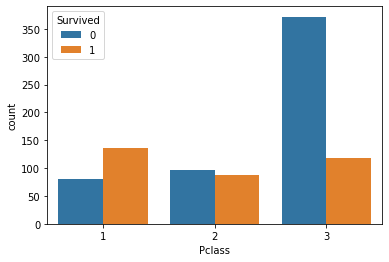

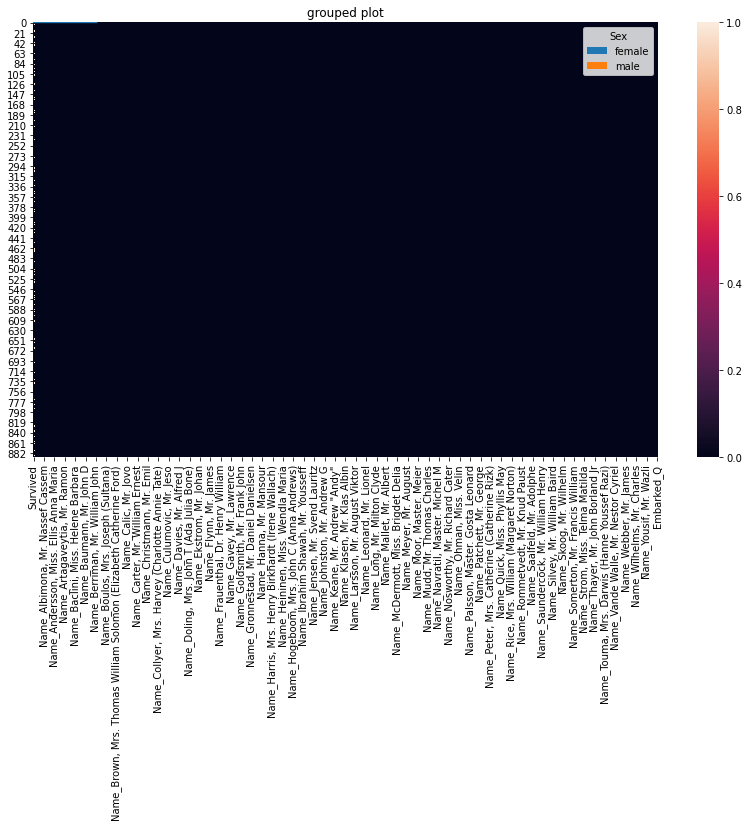

In [66]:
data=read_data('/kaggle/input/titanic/train.csv')
describe_data(data)
print_correlation_matrix(data)
count_plot(data,'Pclass','Survived')
grouped_plot(data,['Sex','Survived'],'Survived')
hist_plot(data,"Age")
delete_columns(data,['Ticket', 'Cabin','PassengerId'])
data = fill_dummies(data)
check_null(data)
fill_null(data,"Age",data.Age.median())
run_logistic_regression(data,'Survived')